# Says One Neuron To Another
## Neural network architectures
1. Set up a new git repository in your GitHub account
2. Pick two datasets from
https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
3. Choose a programming language (Python, C/C++, Java)
4. Formulate ideas on how neural networks can be used to accomplish the task for the specific dataset
5. Build a neural network to model the prediction process programmatically
6. Document your process and results
7. Commit your source code, documentation and other supporting files to the git repository in GitHub

# Dataset:

`tf.keras.datasets.fashion_mnist.load_data()`

- This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
---
- Label	Description

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot
---

- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

- License: The copyright for Fashion-MNIST is held by Zalando SE. Fashion-MNIST is licensed under the MIT license.

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

# Step-1
## Preparing Environment

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

## Importing data

In [20]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


labelMap={0:'T-shirt/top',1:'Trouser',
          2:'Pullover',3:'Dress',4:'Coat',
          5:'Sandal',6:'Shirt',7:'Sneaker',
          8:'Bag',9:'Ankle boot'}

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalizing data

In [21]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

# Step 2: Initializing Parameters
## Weights and Bias

### Structure of Neural Network

- Input Layer has 784 neurons(28 x 28)
- Hidden Layer has 15 neurons
- Output Layer has 10 neurons(10 classes)

- `bias0` and `bias1` are used for forward propagation
- `re_bias0` and `re_bias1` are used for backward propagation


- `weight0` and `weight1` are used for forward propagation
- `re_weight0` and `re_weight1` are used for backward propagation



In [22]:
bias0 = [0]*15
bias1 = [0]*10
re_bias0 = [0]*15
re_bias1 = [0]*10
weight0 = [[0 for i in range(784)]for i in range(15)]
weight1 = [[0 for i in range(15)]for i in range(10)]
re_weight0 = [[0 for i in range(784)]for i in range(15)]
re_weight1 = [[0 for i in range(15)]for i in range(10)]


for i in range(15):
    bias0[i] = np.random.rand()*0.1
for i in range(10):
    bias1[i] = np.random.rand()*0.1
for i in range(15):
    for j in range(784):
        weight0[i][j] = np.random.randn()*0.1
for i in range(10):
    for j in range(15):
        weight1[i][j] = np.random.randn()*0.1

## Input and Output layers

- `Input0` are the values that are given to hidden layer along with weight and bias
- `Output0` are the output of hidden layer from our activation function sigmoid.

- `Input1` are the values given to output layer
- `Output1` is the prediction using softmax function.


In [23]:
Input0 = [0]*15
Input1 = [0]*10
Output0 = [0]*15
Output1 = [0]*10

Input0_test = [0]*15
Input1_test = [0]*10
Output0_test = [0]*15
Output1_test = [0]*10

# Step 3: Defining all Methods
## Sigmoid function
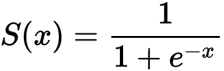

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Derivative of Sigmoid function
- The derivative of the sigmoid function  sigm  at any  x∈R  is implemented as  dsigm(x)dx:=sigm(x)(1−sigm(x))
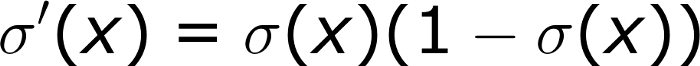

In [25]:
def dsigm(x):
    return  sigmoid(x)*(1-sigmoid(x))   

## Softmax function

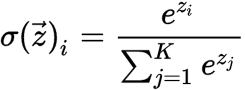

In [26]:
def softmax(x_array):
    a = np.max(x_array)
    exp_x = np.exp(x_array-a)
    sum_exp_x = np.sum(exp_x)
    y_array = exp_x/sum_exp_x
    return y_array

## Delta Function, Sum of Squares Error and Back Propagation Function

In [27]:
def delta(num,t_n,Op1,Ip1,we1):
    sum_1 = 0
    for i in range(10):
        sum_1 += (Op1[i]-t_n[i])*we1[i][num]*dsigm(Ip1[i])
    return sum_1


def sum_of_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)


def back_propagation(Out0,Out1,In0,In1,t_num,x_t,l_rate):
    
    global weight0
    global weight1
    global bias0
    global bias1
    
    for i in range(10):
        for j in range(15):
            re_weight1[i][j] = (Out1[i]-t_num[i])*dsigm(In1[i])
            weight1[i][j] -= l_rate*re_weight1[i][j]*Out0[j]
    
    for i in range(15):
        for j in range(784):
            re_weight0[i][j] = delta(i,t_num,Out1,In1,weight1)*dsigm(In0[i])
            weight0[i][j] -= l_rate*re_weight0[i][j]*x_t[j]
    
    for i in range(10):
        re_bias1[i] = (Out1[i]-t_num[i])*dsigm(In1[i])
        bias1[i] -= l_rate*re_bias1[i]
        
    for i in range(15):
        re_bias0[i] = delta(i,t_num,Out1,In1,weight1)*dsigm(In0[i])
        bias0[i] -= l_rate*re_bias0[i]

## Accuracy Function

In [28]:
def accuracy(y_list,t_list,switch):
    max_y = np.argmax(y_list,axis=1)
    max_t = np.argmax(t_list,axis=1)
    if switch == "train":
        return np.sum(max_y == max_t)/100
    elif switch == "test":
        return np.sum(max_y == max_t)/ 10000


## Function to visualize

In [29]:
def plot_figure(acc, loss, num, name):
    x = list(range(num))
    y = acc
    z = loss
    plt.plot(x, y, label = "accuracy")
    plt.plot(x, z, label = "loss")
    plt.legend(loc = "lower right")
    plt.savefig("../reports/"+name+"_acc_loss.jpg")

# Step 4: Hyperparameters

- After changing the values of these hypermaters, I found that these had a decent performance.

In [30]:
learning_rate = 0.1
epochs = 12
input_words = 3    

# Step 5: Training the model

Epoch :0
Iteration 0:  train_accuracy = 0.15	 train_loss = 0.5090510131253586
Iteration 1:  train_accuracy = 0.21	 train_loss = 0.4741746495957587
Iteration 2:  train_accuracy = 0.22	 train_loss = 0.4629137146506828
Epoch :1
Iteration 3:  train_accuracy = 0.29	 train_loss = 0.4774445609940894
Iteration 4:  train_accuracy = 0.37	 train_loss = 0.45693985771392265
Iteration 5:  train_accuracy = 0.37	 train_loss = 0.404694636761037
Epoch :2
Iteration 6:  train_accuracy = 0.38	 train_loss = 0.4720412188379207
Iteration 7:  train_accuracy = 0.48	 train_loss = 0.4238902684045259
Iteration 8:  train_accuracy = 0.47	 train_loss = 0.3605504342159094
Epoch :3
Iteration 9:  train_accuracy = 0.49	 train_loss = 0.4576145826996712
Iteration 10:  train_accuracy = 0.56	 train_loss = 0.4020583725366636
Iteration 11:  train_accuracy = 0.54	 train_loss = 0.31676350481269455
Epoch :4
Iteration 12:  train_accuracy = 0.58	 train_loss = 0.428541330871881
Iteration 13:  train_accuracy = 0.67	 train_loss = 0.38

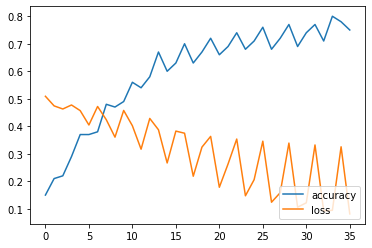

In [31]:
all_train_accuracy = []
all_train_loss = []

for l in range(epochs):
    print("Epoch :"+str(l))
    for k in range(input_words):
        train_prediction = []
        train_answer = []
        print("Iteration "+str(l*input_words+k)+": ", end="")
        for j in range(100):  
            for i in range(15):
                Input0[i]  = np.dot(x_train[k*100+j],weight0[i])+bias0[i]
                Output0[i] = sigmoid(Input0[i])
            for i in range(10):
                Input1[i] = np.dot(Output0,weight1[i])+bias1[i]
            
            Output1 = softmax(Input1)        
            train_num = [0]*10
            train_num[y_train[k*100+j]] = train_num[y_train[k*100+j]]+1
        
            train_prediction.append(Output1)
            train_answer.append(train_num)

            back_propagation(Output0,Output1,Input0,Input1,train_num,x_train[k*100+j],learning_rate)
            
        train_acc = accuracy(train_prediction,train_answer,"train")
        train_loss = sum_of_squares_error(Output1,train_num)
            
        print(" train_accuracy = "+str(train_acc), end="\t")
        print(" train_loss = "+str(train_loss))
            
        all_train_accuracy.append(train_acc)
        all_train_loss.append(train_loss)
    
    
        
number = epochs*input_words
plot_figure(all_train_accuracy, all_train_loss,number,"train")

# Step 6: Testing the model

In [32]:
test_prediction = []
test_answer = []

for j in range(10000):
    for i in range(15):
        Input0_test[i] = np.dot(x_test[j],weight0[i])+bias0[i]
        Output0_test[i] = sigmoid(Input0_test[i])
    for i in range(10):
        Input1_test[i] = np.dot(Output0_test,weight1[i])+bias1[i]
    Output1_test = softmax(Input1_test)
    test_num = [0]*10
    test_num[y_test[j]] = test_num[y_test[j]]+1
        
    test_prediction.append(Output1_test)
    test_answer.append(test_num)
    
test_acc = accuracy(test_prediction,test_answer,"test")
test_loss = sum_of_squares_error(Output1_test,test_num)
    
print("test_accuracy = "+str(test_acc), end="\t")
print("test_loss = "+str(test_loss))


test_accuracy = 0.7077	test_loss = 0.31616444314040526


# Step 7: Visualizing the performance of our model

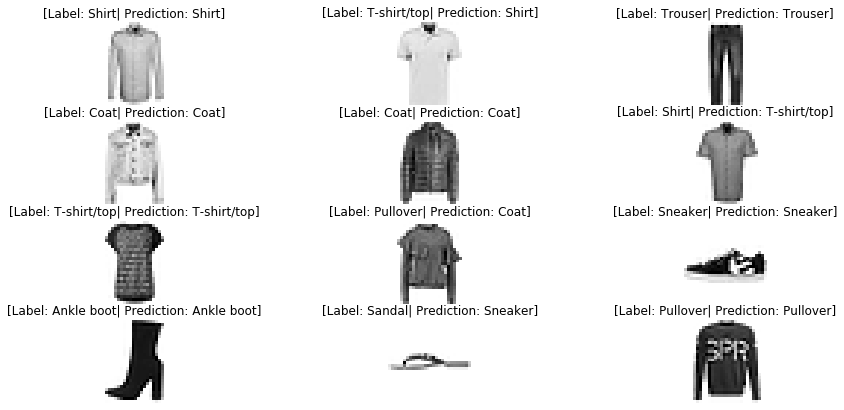

In [33]:
X_train__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 3, figsize=(15, 7))
for i, ax in enumerate(axis.flat):
    randomindex=int(np.random.rand()*1000)
    ax.imshow(X_train__[randomindex], cmap='binary')
    digit = y_test[randomindex]
    prediction=test_prediction[randomindex].argmax()
    ax.axis(False)
    ax.set(title = f"[Label: {labelMap[digit]}| Prediction: {labelMap[prediction]}]");

# Results and Future Developments:

- For training accuracy, we reached a Global Maxima of 80%.
- For testing, we had an accuracy of 70.77%. 

- Our model trained pretty well but we could not obtain similar train and test accuracies this might be because of overfitting or not enough data to train our model or a shallow network with only one hidden layer.
- In future we can try to implement a deeper network with more hidden layers and also instead of initializing weights and biases with random values we can use some standard weights which are trained on more powerful machines.